<a href="https://colab.research.google.com/github/ThePiranhaGuy/hand_sign_keras/blob/main/hand_sign_notebook_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import h5py
import numpy as np
import math
import os

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
K.clear_session()
import itertools
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

plt.rc('figure', autolayout=True)
from numpy.random import seed

seed(10)
tf.keras.utils.set_random_seed(10)
i=1
tf.__version__

'2.8.2'

In [92]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [93]:
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'])
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'])

In [94]:
print(type(x_train))
print(x_train.shape)


<class 'numpy.ndarray'>
(1080, 64, 64, 3)


In [95]:
unique_labels = np.unique(y_train)
print(unique_labels,len(unique_labels))

[0 1 2 3 4 5] 6


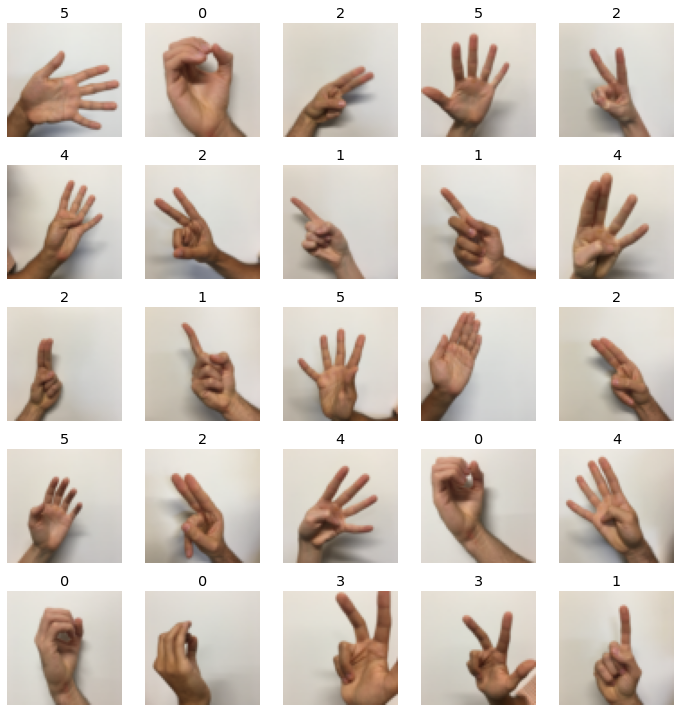

In [96]:

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")
i=0

In [97]:
x_train = x_train/255.0
x_test = x_test/255.0

In [99]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/200
34/34 [==============================] - 3s 63ms/step - loss: 1.7910 - accuracy: 0.1685 - val_loss: 1.7846 - val_accuracy: 0.2500
Epoch 2/200
34/34 [==============================] - 2s 58ms/step - loss: 1.7807 - accuracy: 0.2194 - val_loss: 1.7761 - val_accuracy: 0.3083
Epoch 3/200
34/34 [==============================] - 2s 58ms/step - loss: 1.7711 - accuracy: 0.2630 - val_loss: 1.7658 - val_accuracy: 0.2750
Epoch 4/200
34/34 [==============================] - 2s 58ms/step - loss: 1.7525 - accuracy: 0.3417 - val_loss: 1.7414 - val_accuracy: 0.3250
Epoch 5/200
34/34 [==============================] - 2s 58ms/step - loss: 1.7227 - accuracy: 0.3602 - val_loss: 1.7048 - val_accuracy: 0.4333
Epoch 6/200
34/34 [==============================] - 2s 58ms/step - loss: 1.6582 - accuracy: 0.3889 - val_loss: 1.6358 - val_accuracy: 0.5000
Epoch 7/200
34/34 [==============================] - 2s 58ms/step - loss: 1.5642 - accuracy: 0.4565 - val_loss: 1.5470 - val_accuracy: 0.4167
Epoch 

[0.36853060126304626, 0.8666666746139526]

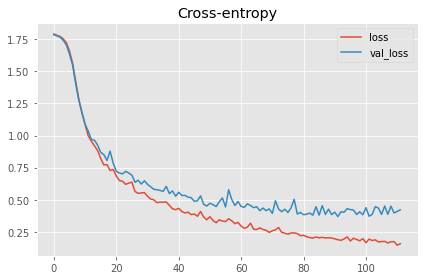

In [116]:



input_shape = x_train.shape[1:]

input_img = tf.keras.Input(shape=input_shape)
## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
## RELU
A1 = tf.keras.layers.ReLU()(Z1)
## MAXPOOL: window 8x8, stride 8, padding 'SAME'
P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2),strides=(1,1),padding='same')(P1)
## RELU
A2 = tf.keras.layers.ReLU()(Z2)
## MAXPOOL: window 4x4, stride 4, padding 'SAME'
P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4,4),padding="same")(A2)
## FLATTEN
F = tf.keras.layers.Flatten()(P2)
## Dense layer
D1 = tf.keras.layers.Dense(64,activation='relu')(F)
## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
outputs = tf.keras.layers.Dense(6,activation="softmax")(D1)
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE
model = tf.keras.Model(inputs=input_img, outputs=outputs)


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
model.evaluate(x_test, y_test)


In [117]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                           

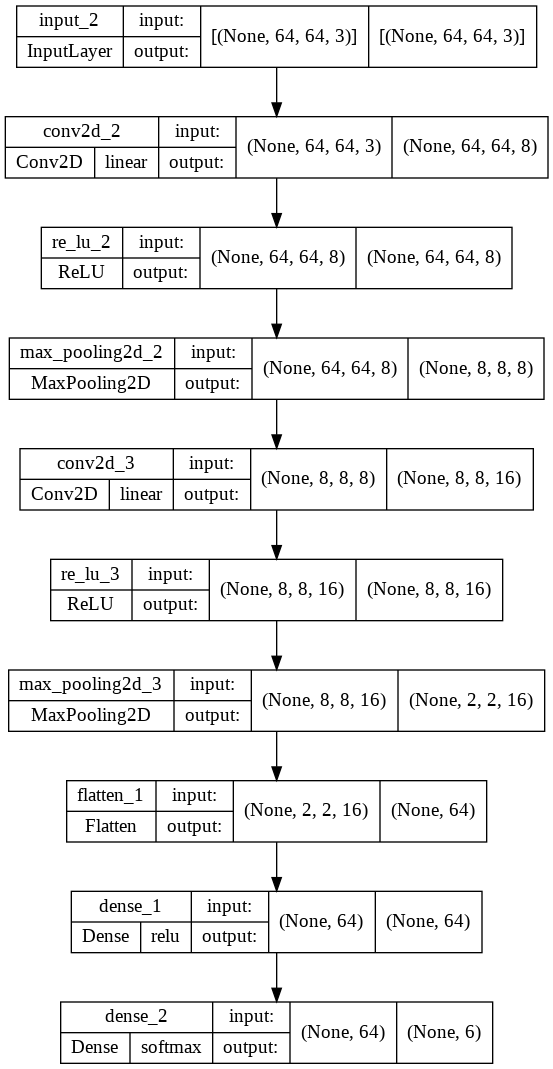

In [118]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

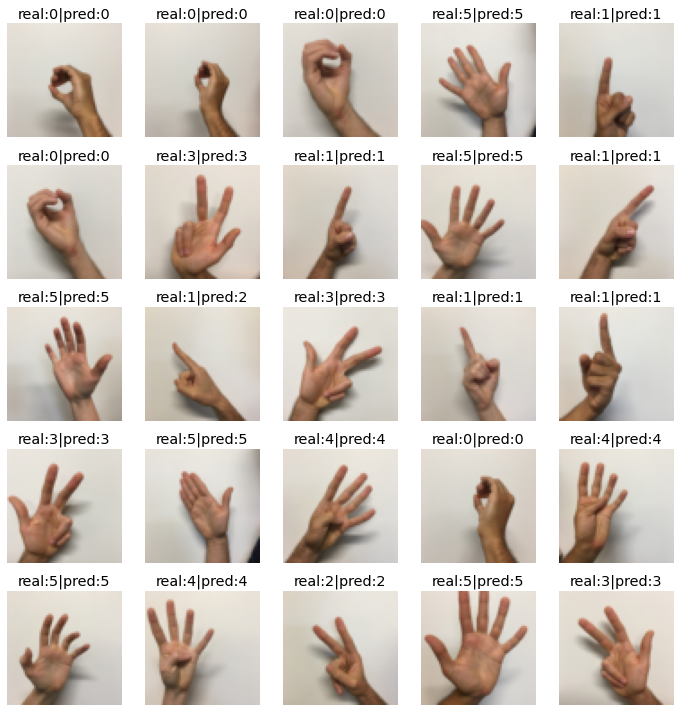

In [119]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    k = np.argmax(model.predict(np.array([x_test[i]])),axis=-1)[0]
    plt.title('real:{}|pred:{}'.format(y_test[i],k))
    plt.axis("off")

In [120]:
model.save('models/model_110/')


In [121]:
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba,axis=-1)

In [122]:
y_pred

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 2, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 4, 4, 1, 3, 2, 3, 1, 0, 5, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
       3, 1, 2, 5, 0, 4, 4, 1, 2, 0, 4, 0, 5, 0, 4, 2, 5, 2, 2, 4, 4, 5,
       0, 1, 3, 5, 0, 4, 3, 1, 3, 4, 3, 5, 1, 5, 2, 0, 2, 3, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 4, 3, 5, 2, 2, 2, 0, 2, 4, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 1, 3])

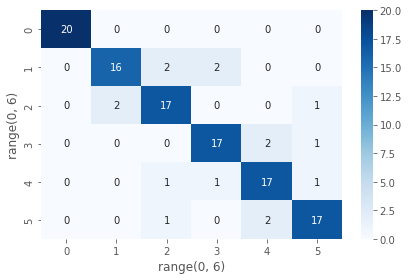

In [123]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat
import seaborn as sns
sns.heatmap(conf_mat,annot=True,cmap='Blues')
plt.xlabel(range(0,6))
plt.ylabel(range(0,6))
plt.show()

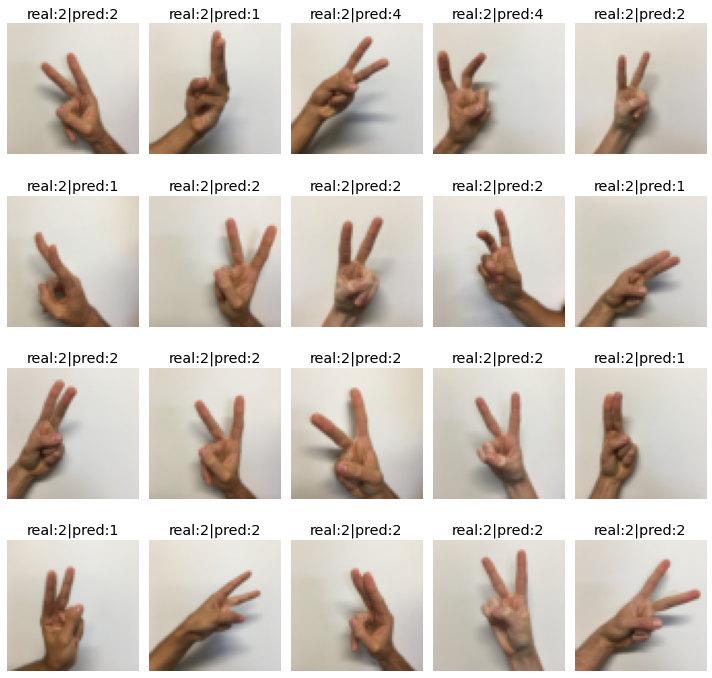

In [115]:
plt.figure(figsize=(10, 10))
count = 1
for i in range(len(y_test)):
  if y_test[i]==2:
      ax = plt.subplot(4, 5, count)
      plt.imshow(x_test[i])
      # k = np.argmax(model.predict(np.array([x_test[i]])),axis=-1)[0]
      plt.title('real:{}|pred:{}'.format(y_test[i],y_pred[i]))
      plt.axis("off")
      count+=1